In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 📈 Linear Regression on Real Estate Dataset

This notebook trains and evaluates a Linear Regression model using a real estate dataset.


In [4]:
df = pd.read_csv("Real_estate (10).csv")
df.head()


,ID,Has_Pool,Num_Bathrooms,Num_Bedrooms,Square_Feet,Year_Built,Price
0,0,0,1,2,120.233627,1938,431988.459327
1,1,0,3,3,288.716320,1935,684319.690455
2,2,0,3,3,250.549245,1935,685065.871514
3,3,0,2,4,287.651787,2013,758604.954952
4,4,1,3,1,110.513818,1920,478489.299027


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             500 non-null    int64  
 1   Has_Pool       500 non-null    int64  
 2   Num_Bathrooms  500 non-null    int64  
 3   Num_Bedrooms   500 non-null    int64  
 4   Square_Feet    500 non-null    float64
 5   Year_Built     500 non-null    int64  
 6   Price          500 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 27.5 KB


,ID,Has_Pool,Num_Bathrooms,Num_Bedrooms,Square_Feet,Year_Built,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.492000,1.976000,2.958000,174.640428,1957.604000,582209.629529
std,144.481833,0.500437,0.820225,1.440968,74.672102,35.491781,122273.390345
min,0.000000,0.000000,1.000000,1.000000,51.265396,1900.000000,276892.470136
25%,124.750000,0.000000,1.000000,2.000000,110.319923,1926.000000,503080.344140
50%,249.500000,0.000000,2.000000,3.000000,178.290937,1959.000000,574724.113347
75%,374.250000,1.000000,3.000000,4.000000,239.031220,1988.000000,665942.301274
max,499.000000,1.000000,3.000000,5.000000,298.241199,2022.000000,960678.274291


In [6]:
X = df.drop(columns=["Price"])
y = df["Price"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


MSE: 1648149489.5427003
RMSE: 40597.40742390701
MAE: 33963.60474672345
R2 Score: 0.9031667625373611


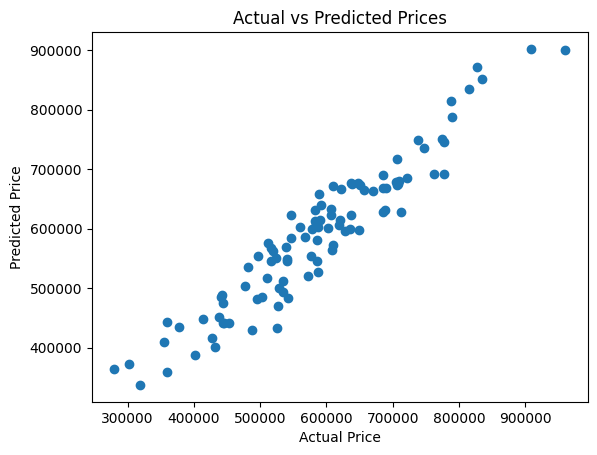

In [11]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [13]:
predictions = X_test.copy()
predictions["Actual_Price"] = y_test.values
predictions["Predicted_Price"] = y_pred

predictions.to_csv("price_predictions.csv", index=False)
